In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.ticker as ticker
import os
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import matplotlib 
import matplotlib.patches as patches

## Mains power consumption data for each individual throughout the month of January 2022

### The date code is the form yymmdd

In [2]:
year = 2022
parent_dir = "C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\Research 2"
file_loc = f"data_files\\{year}"

power220101=pd.read_csv(os.path.join(parent_dir, file_loc, "power-fifteen_20220101.csv"))

power220101.head()

,ee_site_id,regname,min_t,max_t,n,power,apparent_power,pf
0,491,CIRCUIT_1,2022-01-01 00:00:00,2022-01-01 00:14:00,15,0.000,0.014,0.000
1,491,CIRCUIT_1,2022-01-01 00:15:00,2022-01-01 00:29:00,15,0.000,0.014,0.000
2,491,CIRCUIT_1,2022-01-01 00:30:00,2022-01-01 00:44:00,15,4.100,4.107,0.998
3,491,CIRCUIT_1,2022-01-01 00:45:00,2022-01-01 00:59:00,15,2.591,2.601,0.996
4,491,CIRCUIT_1,2022-01-01 01:00:00,2022-01-01 01:14:00,15,2.545,2.555,0.996


In [3]:
mains_power220101=power220101[power220101["regname"]=="Mains"].reset_index(drop=True)
print(mains_power220101.ee_site_id.unique())
print(mains_power220101.ee_site_id.unique().shape)

unique_ids_220101=mains_power220101.ee_site_id.unique().tolist()
unique_ids_220101.remove(7531)

power_dict_220101={}
for i in range(len(unique_ids_220101)):
    power_dict_220101[unique_ids_220101[i]]=mains_power220101[mains_power220101["ee_site_id"]==unique_ids_220101[i]]["power"].tolist()
    
power_df_220101=pd.DataFrame.from_dict(power_dict_220101).transpose()

[  491   493   497   521   751   759   762   851   865   893   913   971
   976   981  1001  1016  1046  1105  1111  1122  1124  1150  1168  1174
  1178  1309  1324  1334  1344  1360  1528  1534  1577  1651  1681  1726
  1946  2086  2091  2141  2236  2451  2476  2521  2561  2581  2616  2631
  2641  2651  2696  2716  2916  2956  3001  3441  3461  3526  3636  3686
  3736  3741  3751  3791  3816  3831  3891  3901  3921  3951  3966  4021
  4041  4051  4106  4121  4151  4156  4196  4201  4426  4441  4461  4521
  4566  4576  4631  4696  4706  4721  4741  4746  4766  4771  4786  4811
  4841  4851  5091  5126  5231  5486  5791  5896  6166  6176  6281  6356
  6406  6441  6471  6966  6986  6991  7081  7471  7501  7511  7531  7532
  7606  7616  7626  7666  7746  7871  8021  8086  8121  8126  8131  8136
  8161  8166  8171  8221  8231  8236  8271  8281  8336  8341  8346  8371
  8376  8431  8506  8641  8661  8666  8696  8731  8746  8761  8816  8891
  8976  9006  9036  9041  9121  9251  9291  9421  9

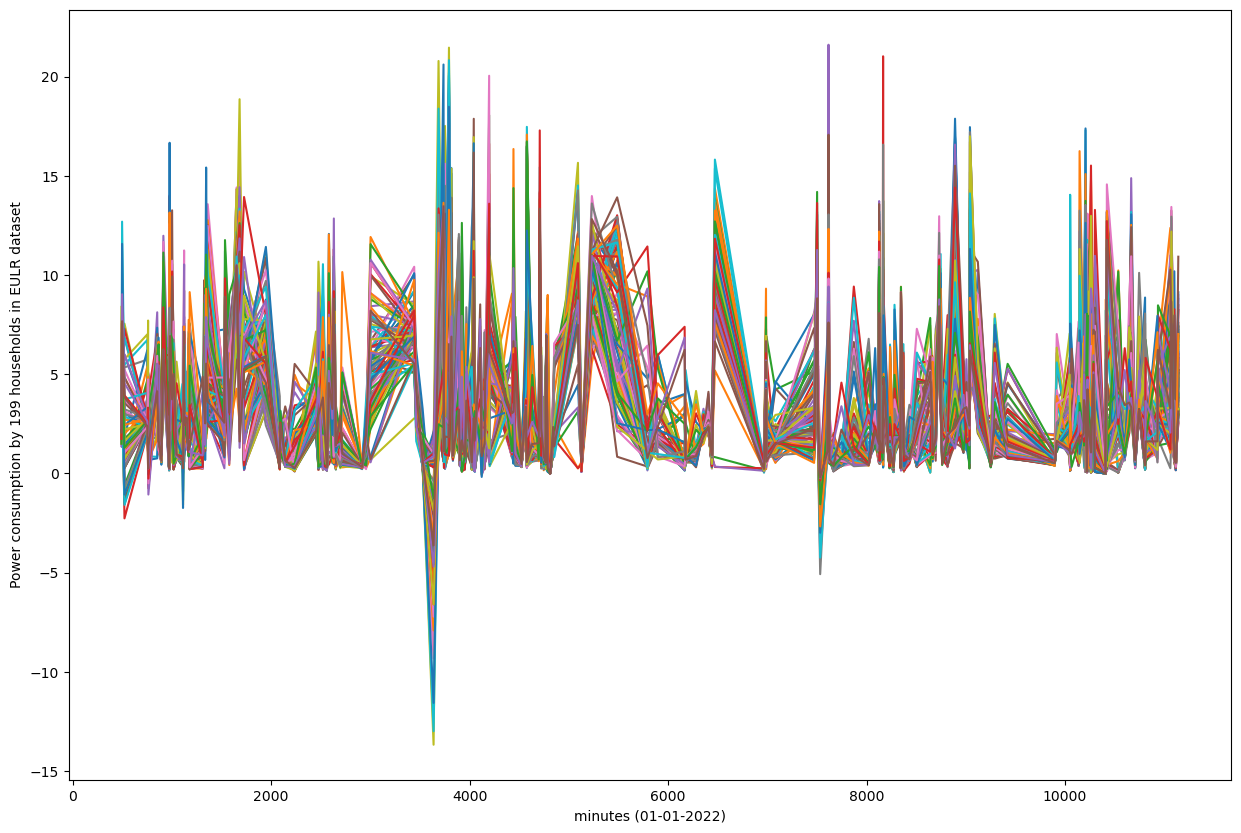

In [4]:
power_df_220101.plot(figsize=(15,10), legend=False)
plt.ylabel("Power consumption by 199 households in EULR dataset")
plt.xlabel("minutes (01-01-2022)")
plt.show()
#plt.savefig("individual_power_consumption")

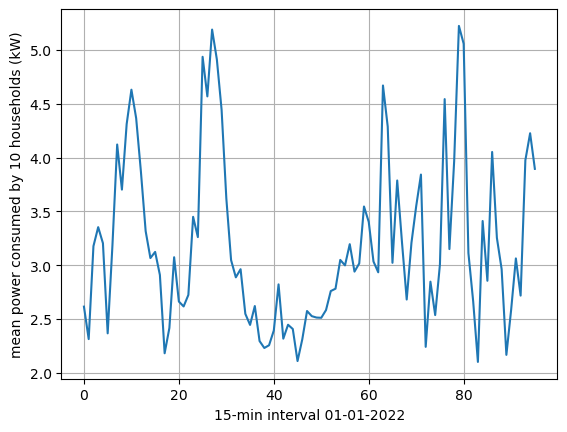

In [5]:
#plt.figure(figsize=(10,7))
plt.xlabel("15-min interval 01-01-2022")
plt.ylabel("mean power consumed by 10 households (kW)")
plt.grid()
plt.plot(power_df_220101.iloc[0:5,].mean())
plt.savefig("10houses")

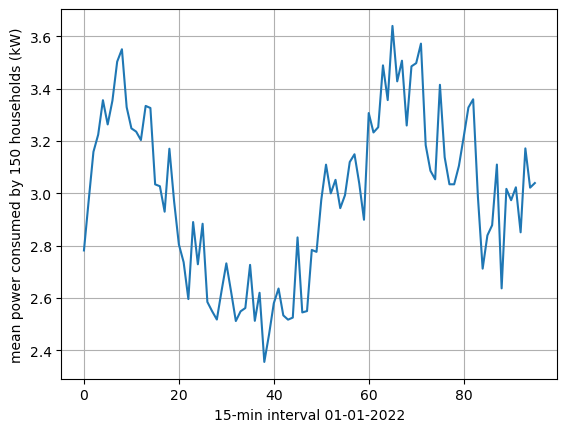

In [6]:
#plt.figure(figsize=(10,7))
plt.xlabel("15-min interval 01-01-2022")
plt.ylabel("mean power consumed by 150 households (kW)")
plt.grid()
plt.plot(power_df_220101.iloc[0:150,].mean())
plt.savefig("150houses")

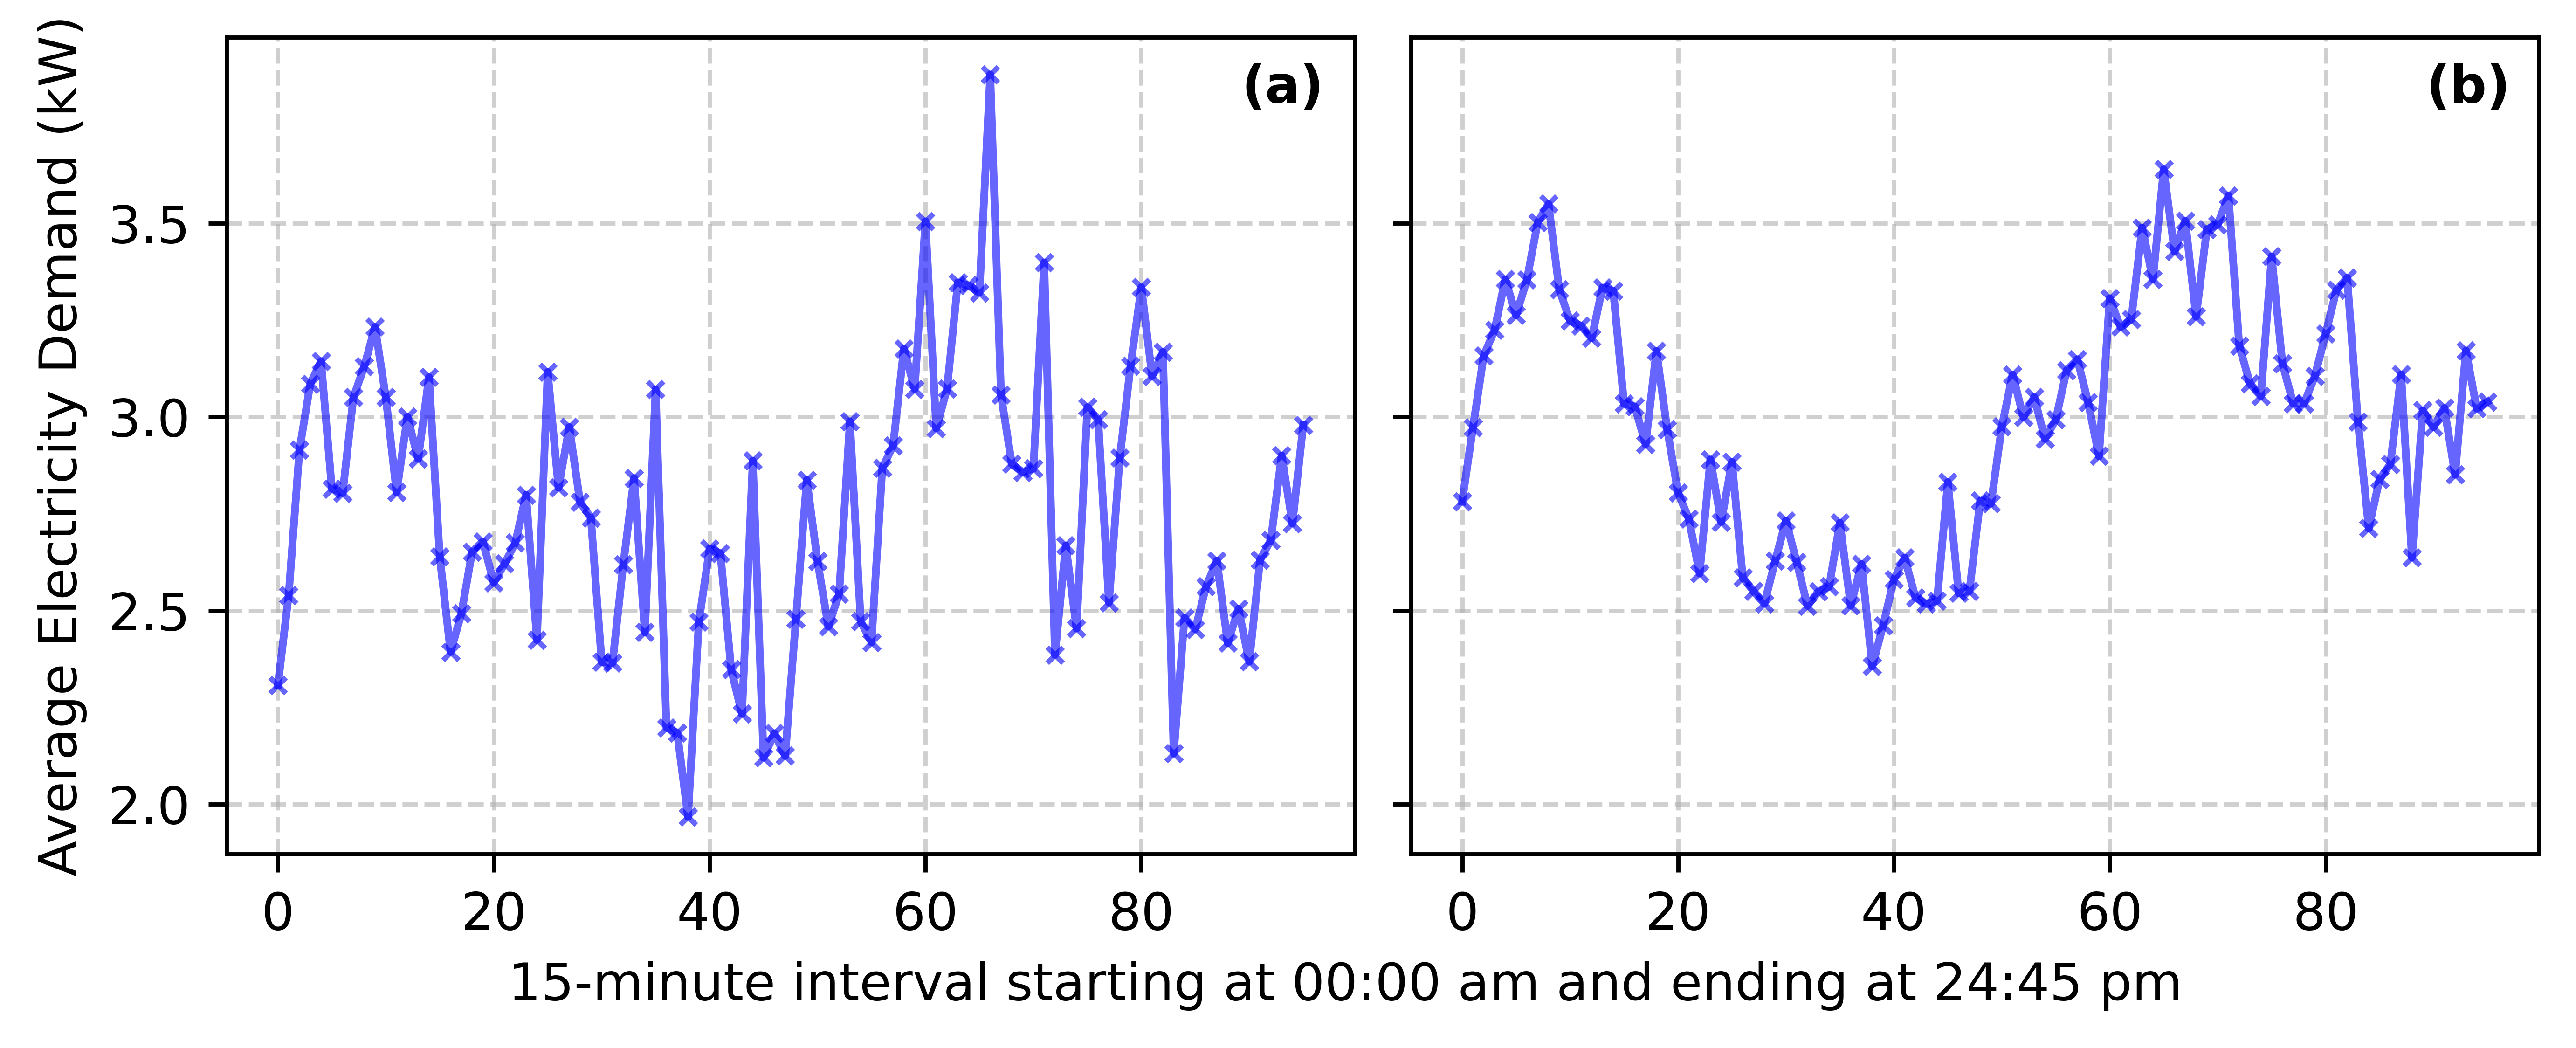

In [7]:
# Create figure and subplots

plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

fig, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=800, sharey=True)

# --- Left subplot: Mean over first 25 time points ---
axs[0].plot(power_df_220101.iloc[0:25, :].mean(),
            marker='x', linestyle='-', color='blue', alpha=0.6, markersize=3)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].set_ylabel('Average Electricity Demand (kW)', fontsize=10)  # Y-axis label font size

# --- Right subplot: Mean over all 150 time points ---
axs[1].plot(power_df_220101.iloc[0:150, :].mean(),
            marker='x', linestyle='-', color='blue', alpha=0.6, markersize=3)
axs[1].grid(True, linestyle='--', alpha=0.6)

# Add a common x-axis label for the entire figure
fig.supxlabel('15-minute interval starting at 00:00 am and ending at 24:45 pm', fontsize=10)

# Adjust tick label fonts for both subplots
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=10)  # Tick label font size

# Adjust layout to avoid overlap
plt.subplots_adjust(bottom=0.15, wspace=0.05)
axs[0].text(0.9, 0.92, "(a)", transform=axs[0].transAxes, fontsize=10, weight="bold")
axs[1].text(0.9, 0.92, "(b)", transform=axs[1].transAxes, fontsize=10, weight="bold")

parent_dir = "C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\Research 2"
plots = "plots"

# Save as a vector graphic for publication-quality output
plt.savefig(os.path.join(parent_dir, plots, "25 vs 150 aggregate demand comparison.png"), bbox_inches='tight')

# Show the plot
plt.show()

'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\Research 2\\EULR raw\\workdir'

In [29]:
pwd()

'C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\Research 2\\EULR raw\\2022\\2022_Q1_v7\\2022_Q1_v7\\Jan\\power'

In [30]:
mains_power220101["min_t"]=pd.to_datetime(mains_power220101["min_t"])

In [31]:
mains_power220101["max_t"]=pd.to_datetime(mains_power220101["max_t"])

In [32]:
ts_220101=pd.pivot_table(mains_power220101, values='power', index='min_t', columns='ee_site_id')

In [33]:
ts_220101.isna().sum().sum()

7

In [34]:
ts_220101

ee_site_id,491,493,497,521,751,759,762,851,865,893,...,10746,10806,10811,10931,10936,11061,11071,11101,11116,11141
min_t,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2.153,2.281,4.962,1.150,2.526,2.315,0.549,4.424,2.078,1.099,...,6.619,0.586,2.852,0.797,7.167,2.192,2.303,1.391,0.641,3.665
2022-01-01 00:15:00,1.701,2.124,4.339,1.166,2.233,1.017,0.806,6.256,5.931,1.168,...,3.881,0.760,2.778,0.775,7.062,2.707,2.106,2.156,0.517,5.687
2022-01-01 00:30:00,5.605,2.101,4.627,1.230,2.319,4.018,0.762,3.866,3.161,1.341,...,4.936,2.846,6.745,0.993,7.932,1.700,6.704,1.466,0.561,7.442
2022-01-01 00:45:00,4.458,2.187,6.167,1.437,2.516,3.028,2.384,3.105,2.582,1.565,...,4.117,0.640,3.420,1.605,3.240,3.164,6.476,1.985,0.670,3.014
2022-01-01 01:00:00,4.421,2.924,4.755,1.207,2.712,1.045,3.563,3.240,3.355,3.471,...,6.808,0.532,3.926,2.211,3.219,4.057,6.159,1.401,0.678,8.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 22:45:00,1.505,2.565,6.025,2.443,2.774,0.294,0.280,3.605,1.710,1.100,...,3.719,0.708,1.741,7.121,3.449,1.041,4.068,1.565,0.650,7.031
2022-01-01 23:00:00,1.500,2.073,6.043,1.297,2.671,2.808,0.606,5.314,1.675,0.993,...,3.254,1.120,1.809,5.672,4.525,2.112,4.776,1.136,0.597,2.968
2022-01-01 23:15:00,1.746,3.541,8.109,3.940,2.540,3.318,-0.257,5.522,1.651,1.008,...,3.225,1.520,5.826,3.832,3.161,1.210,3.575,0.774,0.730,2.526


In [35]:
ts_220101.interpolate(method='linear', limit_direction='forward', axis=0,inplace=True)

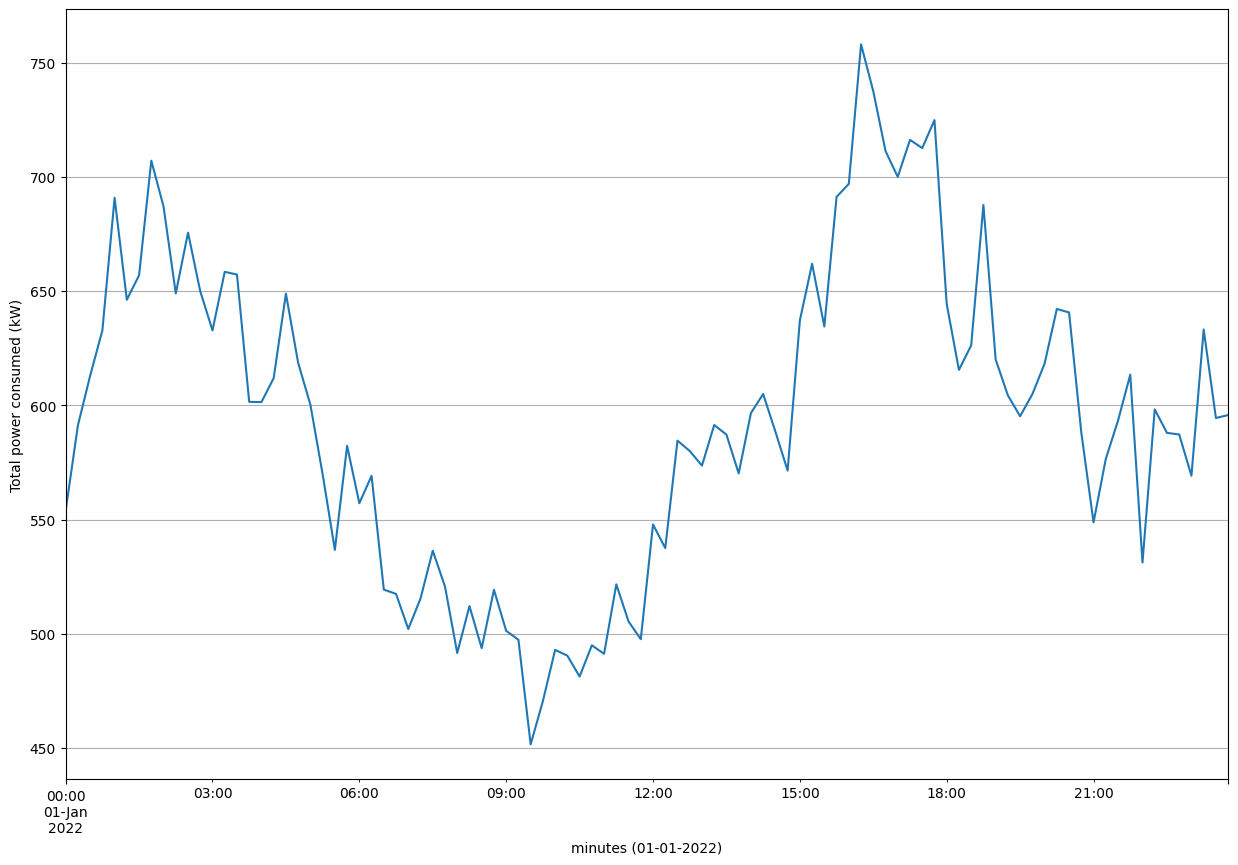

In [36]:
ts_220101.transpose().sum().plot(figsize=(15,10))
plt.ylabel("Total power consumed (kW)")
plt.xlabel("minutes (01-01-2022)")
plt.savefig("total power consumed 01-01-2022")
plt.grid()
plt.show()

In [37]:
sb.set_theme(style="darkgrid")
sb.set(rc={"figure.figsize":(15,15)})

C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\285831316.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sb.pointplot( x = "min_t", y= "power",data = mains_power220101, ci = "sd")


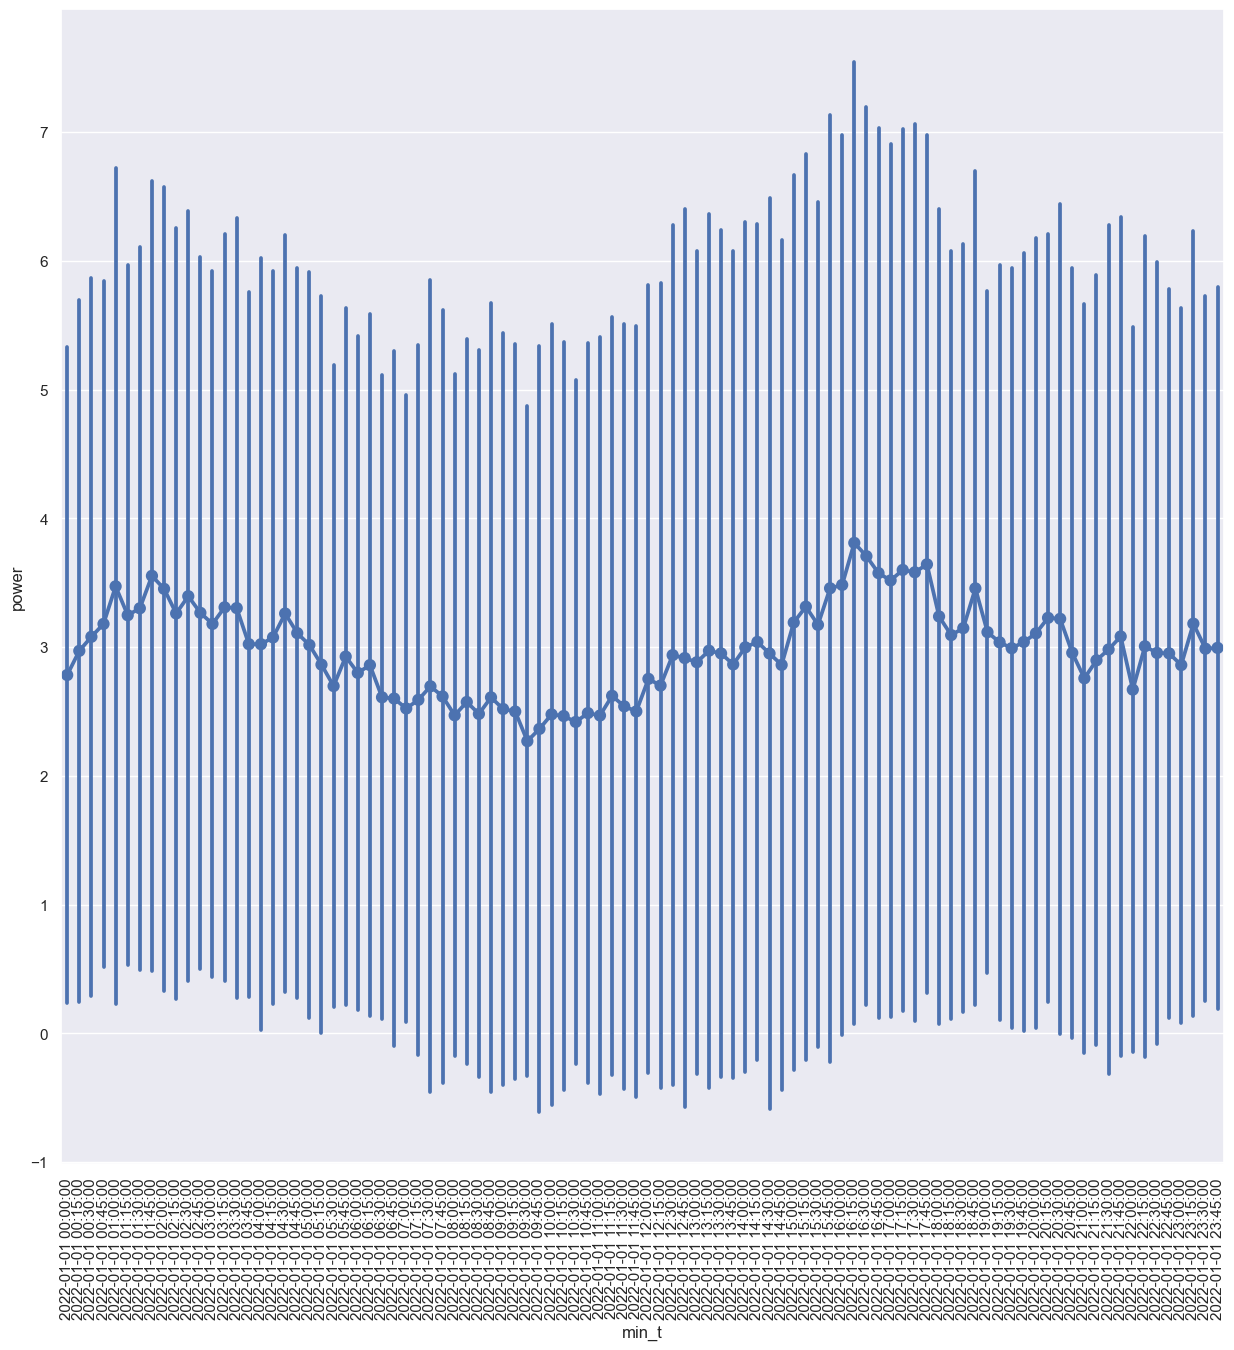

In [38]:
ax=sb.pointplot( x = "min_t", y= "power",data = mains_power220101, ci = "sd")
ax.set_xticklabels(ts_220101.index, rotation=90)
# display

plt.show()

### Plots for the month

In [39]:
sb.set_theme(style="darkgrid")
sb.set(rc={"figure.figsize":(15, 10)})

In [40]:
time_ind=[i for i in range(0,1440,15)]

In [41]:
jan_22=pd.DataFrame()
for i in range(1,32):
    m=str(i)
    if len(m)==1:
        m="0"+m
    path="power-fifteen_202201" +m+".csv"
    temp_df=pd.read_csv(path)
    temp_df=temp_df[temp_df["regname"]=="Mains"].reset_index(drop=True)
    temp_df["min_t"]=pd.to_datetime(temp_df["min_t"])
    temp_df["max_t"]=pd.to_datetime(temp_df["max_t"])
#     ax=sb.pointplot( x = "min_t", y= "power",data = temp_df, ci = "sd")
#     ax.set_xticklabels(time_ind, rotation=90)
#     plt.title("Day "+m+" average power consumption (kW)")
# # display
    jan_22=jan_22.append(temp_df)
    
    jan_22.reset_index(inplace=True, drop=True)
#     plt.savefig(m+".png", bbox_inches='tight')
#     plt.show()

C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3677929773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jan_22=jan_22.append(temp_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3677929773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jan_22=jan_22.append(temp_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3677929773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jan_22=jan_22.append(temp_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3677929773.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jan_22=jan_22.append(temp_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_638

In [42]:
jan_22

,ee_site_id,regname,min_t,max_t,n,power,apparent_power,pf
0,491,Mains,2022-01-01 00:00:00,2022-01-01 00:14:00,15,2.153,2.245,0.959
1,491,Mains,2022-01-01 00:15:00,2022-01-01 00:29:00,15,1.701,1.782,0.955
2,491,Mains,2022-01-01 00:30:00,2022-01-01 00:44:00,15,5.605,5.626,0.996
3,491,Mains,2022-01-01 00:45:00,2022-01-01 00:59:00,15,4.458,4.498,0.991
4,491,Mains,2022-01-01 01:00:00,2022-01-01 01:14:00,15,4.421,4.454,0.993
...,...,...,...,...,...,...,...,...
585626,11141,Mains,2022-01-31 22:45:00,2022-01-31 22:59:00,15,3.223,3.472,0.928
585627,11141,Mains,2022-01-31 23:00:00,2022-01-31 23:14:00,15,7.649,7.881,0.970
585628,11141,Mains,2022-01-31 23:15:00,2022-01-31 23:29:00,15,4.930,5.080,0.971
585629,11141,Mains,2022-01-31 23:30:00,2022-01-31 23:44:00,15,4.410,4.566,0.966


In [43]:
pivot_jan_22=pd.pivot_table(jan_22, values='power', index='min_t', columns='ee_site_id')

In [44]:
pivot_jan_22.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:15:00',
               '2022-01-01 00:30:00', '2022-01-01 00:45:00',
               '2022-01-01 01:00:00', '2022-01-01 01:15:00',
               '2022-01-01 01:30:00', '2022-01-01 01:45:00',
               '2022-01-01 02:00:00', '2022-01-01 02:15:00',
               ...
               '2022-01-31 21:30:00', '2022-01-31 21:45:00',
               '2022-01-31 22:00:00', '2022-01-31 22:15:00',
               '2022-01-31 22:30:00', '2022-01-31 22:45:00',
               '2022-01-31 23:00:00', '2022-01-31 23:15:00',
               '2022-01-31 23:30:00', '2022-01-31 23:45:00'],
              dtype='datetime64[ns]', name='min_t', length=2976, freq=None)

In [45]:
sb.set_theme(style="darkgrid")
sb.set(rc={"figure.figsize":(35,15)})

In [46]:
plot_index=[]
for i in range(0,len(pivot_jan_22.index)):
    if i%96==0:
        plot_index.append(i//96)
    else:
        plot_index.append(" ")

C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\2770903298.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sb.pointplot( x = "min_t", y= "power",data = jan_22, ci = "sd", errwidth=0.1)


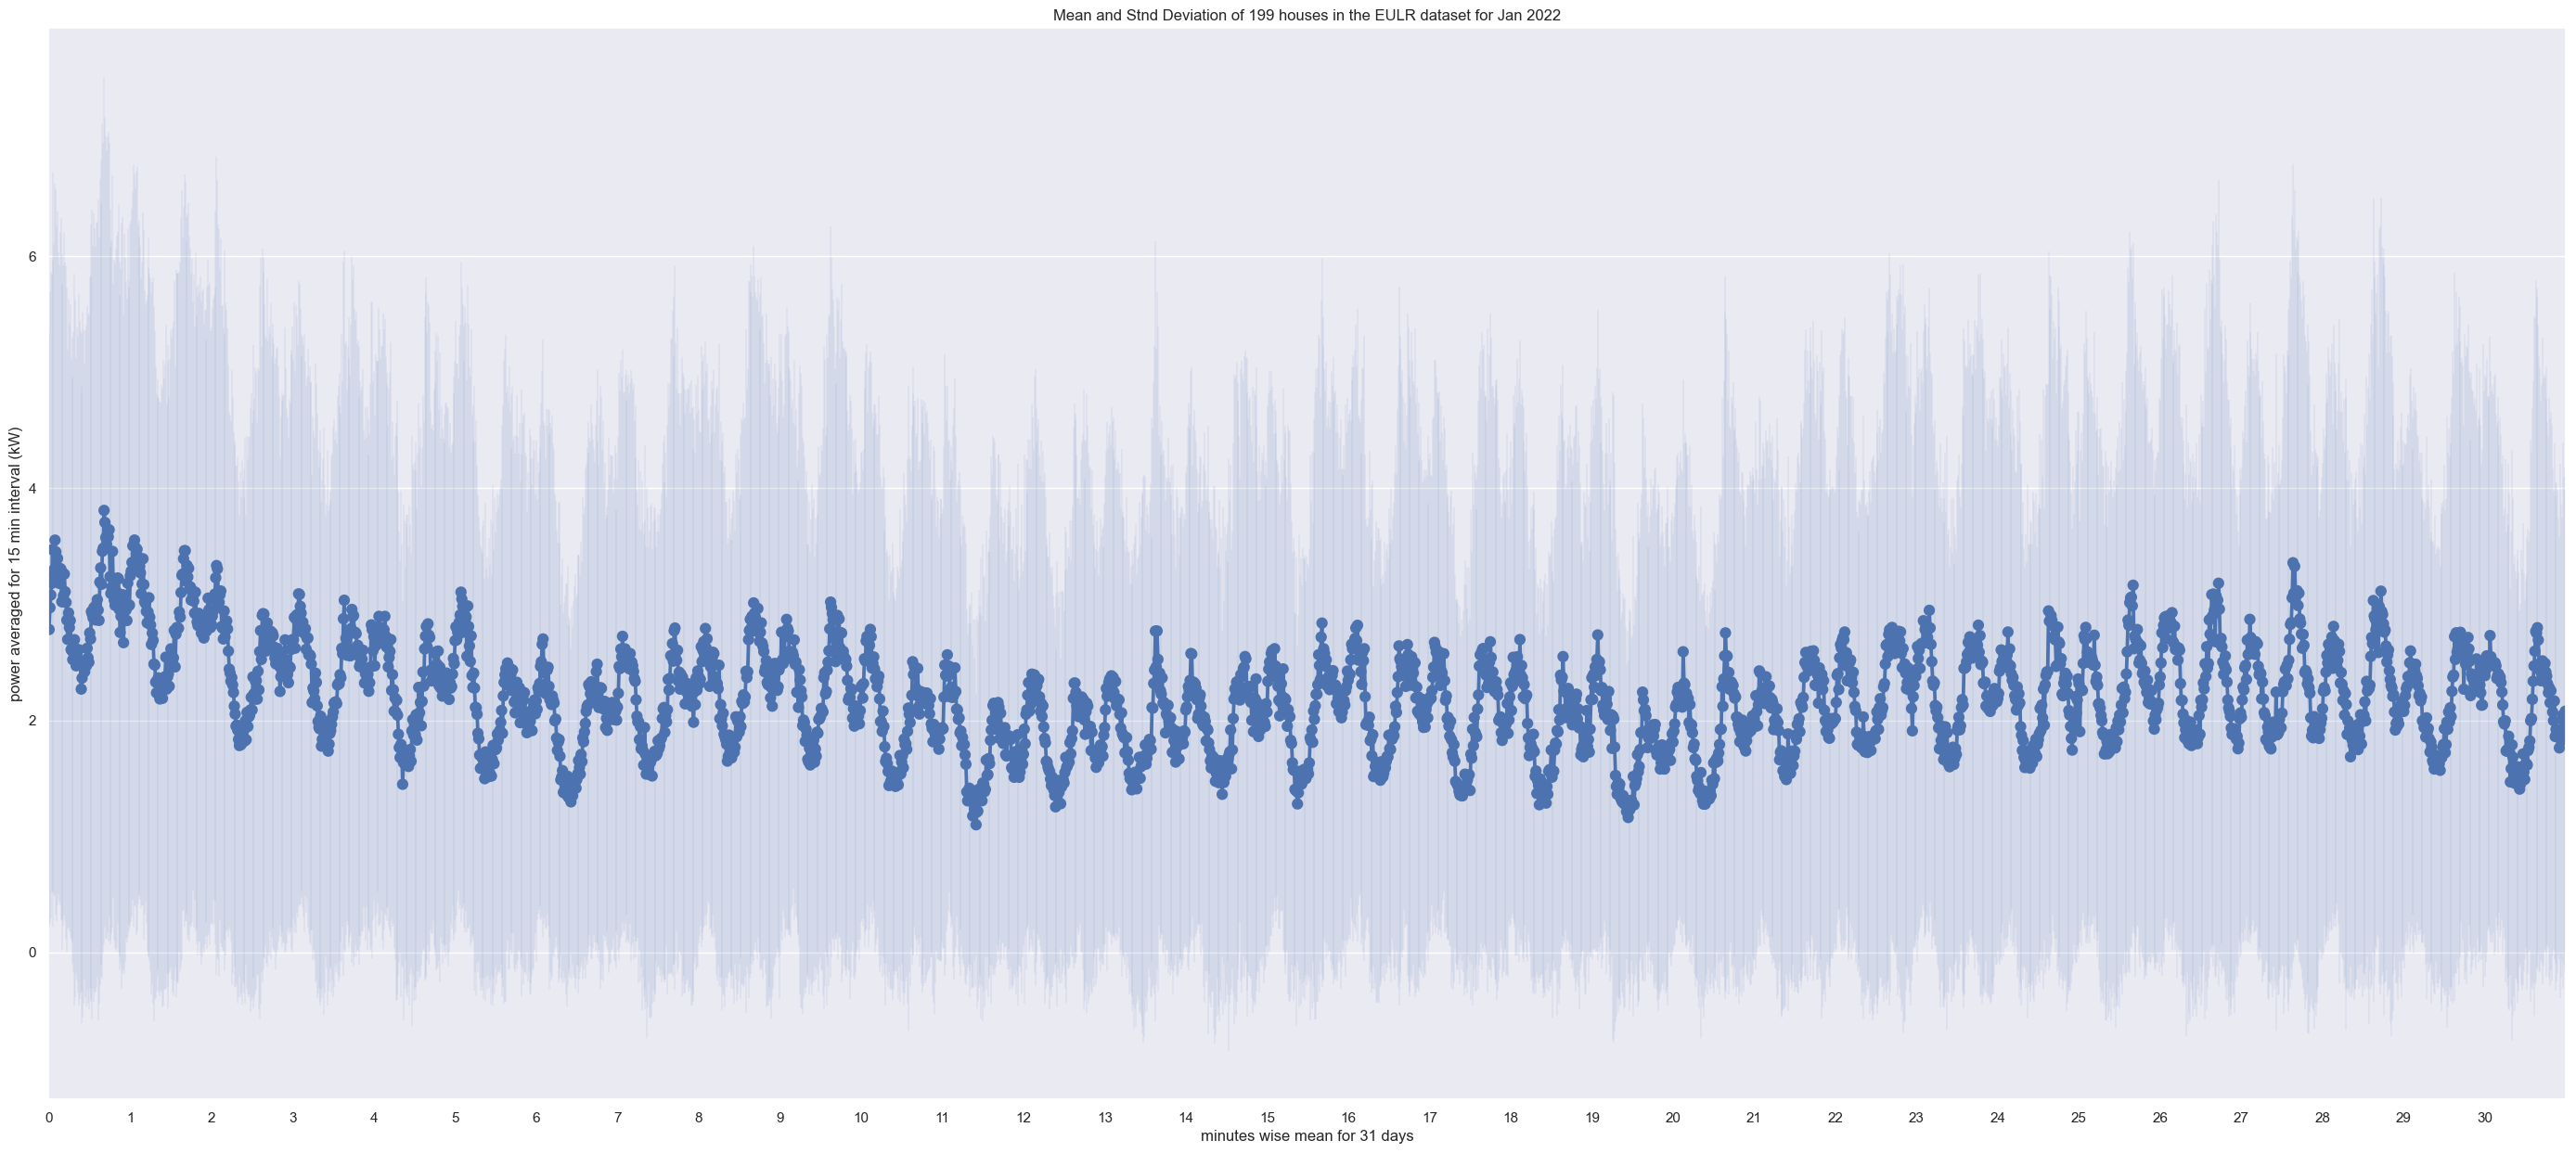

In [47]:
plt.plot(pivot_jan_22.transpose().mean(),color="r")
ax=sb.pointplot( x = "min_t", y= "power",data = jan_22, ci = "sd", errwidth=0.1)
ax.set(title='Mean and Stnd Deviation of 199 houses in the EULR dataset for Jan 2022')
ax.set_xticklabels(plot_index,rotation=0)
plt.ylabel('power averaged for 15 min interval (kW)')
plt.xlabel('minutes wise mean for 31 days')
# display
plt.savefig("mean and stnd dev jan 2022")
plt.show()

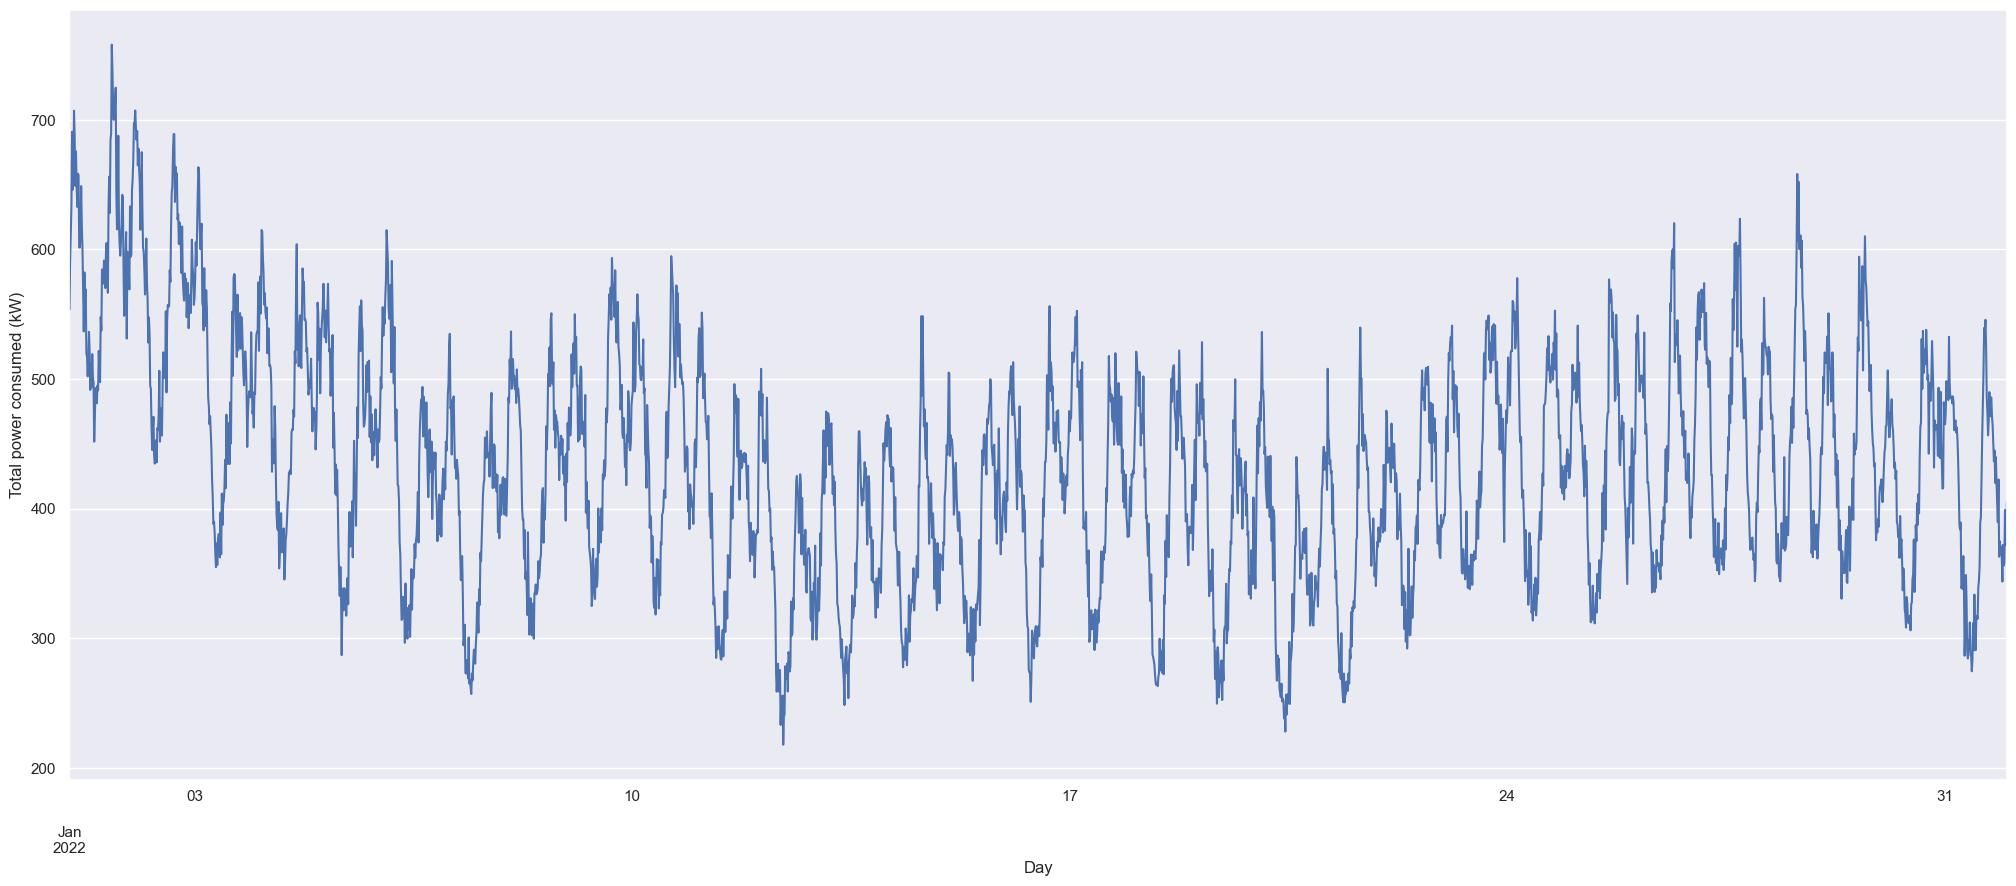

In [48]:
pivot_jan_22.transpose().sum().plot(figsize=(25,10))
plt.ylabel("Total power consumed (kW)")
plt.xlabel("Day")
plt.savefig("total power consumed for jan 2022")

In [49]:
pivot_jan_22

ee_site_id,491,493,497,521,751,759,762,851,865,893,...,10746,10806,10811,10931,10936,11061,11071,11101,11116,11141
min_t,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2.153,2.281,4.962,1.150,2.526,2.315,0.549,4.424,2.078,1.099,...,6.619,0.586,2.852,0.797,7.167,2.192,2.303,1.391,0.641,3.665
2022-01-01 00:15:00,1.701,2.124,4.339,1.166,2.233,1.017,0.806,6.256,5.931,1.168,...,3.881,0.760,2.778,0.775,7.062,2.707,2.106,2.156,0.517,5.687
2022-01-01 00:30:00,5.605,2.101,4.627,1.230,2.319,4.018,0.762,3.866,3.161,1.341,...,4.936,2.846,6.745,0.993,7.932,1.700,6.704,1.466,0.561,7.442
2022-01-01 00:45:00,4.458,2.187,6.167,1.437,2.516,3.028,2.384,3.105,2.582,1.565,...,4.117,0.640,3.420,1.605,3.240,3.164,6.476,1.985,0.670,3.014
2022-01-01 01:00:00,4.421,2.924,4.755,1.207,2.712,1.045,3.563,3.240,3.355,3.471,...,6.808,0.532,3.926,2.211,3.219,4.057,6.159,1.401,0.678,8.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 22:45:00,1.124,1.803,1.355,-2.481,2.055,4.693,-0.657,7.221,0.915,0.457,...,1.988,0.953,1.233,0.283,0.717,0.284,7.912,1.191,0.389,3.223
2022-01-31 23:00:00,1.114,2.463,1.007,4.469,1.786,6.085,1.461,6.572,0.865,0.544,...,2.076,0.924,2.702,0.396,0.633,1.317,6.917,1.297,0.485,7.649
2022-01-31 23:15:00,1.292,1.546,1.286,4.454,1.356,3.022,-1.116,4.736,0.812,0.931,...,4.090,0.870,1.471,0.613,0.611,0.486,2.108,0.946,0.453,4.930


In [50]:

def month_power_consumption(month, end_day, year, month_code):
    df_month=pd.DataFrame()
    
    year=str(year)
    for i in range(1,end_day+1):
        d=str(i)
        if len(d)==1:
            d="0"+d
        path="C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\Research 2\\EULR raw\\"+year+"\\"+year+"_Q1_v7\\"+year+"_Q1_v7\\"+month+"\\power\\power-fifteen_"+year+month_code +d+".csv"
        trans_df=pd.read_csv(path)
        trans_df=trans_df[trans_df["regname"]=="Mains"].reset_index(drop=True)
        trans_df["min_t"]=pd.to_datetime(trans_df["min_t"])
        trans_df["max_t"]=pd.to_datetime(trans_df["max_t"])
        df_month=df_month.append(trans_df)
        df_month.reset_index(inplace=True, drop=True)
    return df_month

In [51]:
feb_22=month_power_consumption("Feb", 28, 2022, "02")

C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3646233222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month=df_month.append(trans_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3646233222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month=df_month.append(trans_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3646233222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month=df_month.append(trans_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3646233222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month=df_month.append(trans_df)
C:\Users\dube.rohit\AppData\Loca

In [52]:
feb_22

,ee_site_id,regname,min_t,max_t,n,power,apparent_power,pf
0,491,Mains,2022-02-01 00:00:00,2022-02-01 00:14:00,15,1.409,1.523,0.925
1,491,Mains,2022-02-01 00:15:00,2022-02-01 00:29:00,15,2.596,2.661,0.976
2,491,Mains,2022-02-01 00:30:00,2022-02-01 00:44:00,15,1.462,1.535,0.952
3,491,Mains,2022-02-01 00:45:00,2022-02-01 00:59:00,15,3.568,3.655,0.976
4,491,Mains,2022-02-01 01:00:00,2022-02-01 01:14:00,15,1.662,1.745,0.952
...,...,...,...,...,...,...,...,...
523736,11141,Mains,2022-02-28 22:45:00,2022-02-28 22:59:00,15,1.560,1.706,0.915
523737,11141,Mains,2022-02-28 23:00:00,2022-02-28 23:14:00,15,1.469,1.539,0.955
523738,11141,Mains,2022-02-28 23:15:00,2022-02-28 23:29:00,15,1.409,1.489,0.946
523739,11141,Mains,2022-02-28 23:30:00,2022-02-28 23:44:00,15,2.292,2.497,0.918


In [53]:
jan_22

,ee_site_id,regname,min_t,max_t,n,power,apparent_power,pf
0,491,Mains,2022-01-01 00:00:00,2022-01-01 00:14:00,15,2.153,2.245,0.959
1,491,Mains,2022-01-01 00:15:00,2022-01-01 00:29:00,15,1.701,1.782,0.955
2,491,Mains,2022-01-01 00:30:00,2022-01-01 00:44:00,15,5.605,5.626,0.996
3,491,Mains,2022-01-01 00:45:00,2022-01-01 00:59:00,15,4.458,4.498,0.991
4,491,Mains,2022-01-01 01:00:00,2022-01-01 01:14:00,15,4.421,4.454,0.993
...,...,...,...,...,...,...,...,...
585626,11141,Mains,2022-01-31 22:45:00,2022-01-31 22:59:00,15,3.223,3.472,0.928
585627,11141,Mains,2022-01-31 23:00:00,2022-01-31 23:14:00,15,7.649,7.881,0.970
585628,11141,Mains,2022-01-31 23:15:00,2022-01-31 23:29:00,15,4.930,5.080,0.971
585629,11141,Mains,2022-01-31 23:30:00,2022-01-31 23:44:00,15,4.410,4.566,0.966


In [54]:
mar_22=month_power_consumption("Mar", 31, 2022, "03")

C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3646233222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month=df_month.append(trans_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3646233222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month=df_month.append(trans_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3646233222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month=df_month.append(trans_df)
C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\3646233222.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_month=df_month.append(trans_df)
C:\Users\dube.rohit\AppData\Loca

In [55]:
mar_22

,ee_site_id,regname,min_t,max_t,n,power,apparent_power,pf
0,491,Mains,2022-03-01 00:00:00,2022-03-01 00:14:00,15,2.314,2.377,0.974
1,491,Mains,2022-03-01 00:15:00,2022-03-01 00:29:00,15,0.839,0.942,0.891
2,491,Mains,2022-03-01 00:30:00,2022-03-01 00:44:00,15,0.918,1.032,0.890
3,491,Mains,2022-03-01 00:45:00,2022-03-01 00:59:00,15,1.012,1.117,0.906
4,491,Mains,2022-03-01 01:00:00,2022-03-01 01:14:00,15,1.174,1.249,0.939
...,...,...,...,...,...,...,...,...
576325,11141,Mains,2022-03-31 22:45:00,2022-03-31 22:59:00,15,5.330,5.434,0.981
576326,11141,Mains,2022-03-31 23:00:00,2022-03-31 23:14:00,15,1.664,1.789,0.930
576327,11141,Mains,2022-03-31 23:15:00,2022-03-31 23:29:00,15,1.934,1.959,0.987
576328,11141,Mains,2022-03-31 23:30:00,2022-03-31 23:44:00,15,2.789,2.894,0.964


## Find common ee_site_ids in all the months

In [56]:
jan_sites, feb_sites, mar_sites=jan_22.ee_site_id.unique(), feb_22.ee_site_id.unique(), mar_22.ee_site_id.unique()

In [57]:
common_sites = list(
    set(jan_sites).intersection(feb_sites, mar_sites)
)

In [58]:
common_sites=np.sort(common_sites)

# Site-wise power consumption time series

In [59]:
sitepower_jan_22=pd.pivot_table(jan_22, values='power', index='min_t', columns='ee_site_id')
sitepower_feb_22=pd.pivot_table(feb_22, values='power', index='min_t', columns='ee_site_id')
sitepower_mar_22=pd.pivot_table(mar_22, values='power', index='min_t', columns='ee_site_id')

In [60]:
Q1_2022=pd.concat([sitepower_jan_22[common_sites],sitepower_feb_22[common_sites],sitepower_mar_22[common_sites]])

In [61]:
Q1_2022

ee_site_id,491,493,497,521,751,759,762,851,865,893,...,10746,10806,10811,10931,10936,11061,11071,11101,11116,11141
min_t,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2.153,2.281,4.962,1.150,2.526,2.315,0.549,4.424,2.078,1.099,...,6.619,0.586,2.852,0.797,7.167,2.192,2.303,1.391,0.641,3.665
2022-01-01 00:15:00,1.701,2.124,4.339,1.166,2.233,1.017,0.806,6.256,5.931,1.168,...,3.881,0.760,2.778,0.775,7.062,2.707,2.106,2.156,0.517,5.687
2022-01-01 00:30:00,5.605,2.101,4.627,1.230,2.319,4.018,0.762,3.866,3.161,1.341,...,4.936,2.846,6.745,0.993,7.932,1.700,6.704,1.466,0.561,7.442
2022-01-01 00:45:00,4.458,2.187,6.167,1.437,2.516,3.028,2.384,3.105,2.582,1.565,...,4.117,0.640,3.420,1.605,3.240,3.164,6.476,1.985,0.670,3.014
2022-01-01 01:00:00,4.421,2.924,4.755,1.207,2.712,1.045,3.563,3.240,3.355,3.471,...,6.808,0.532,3.926,2.211,3.219,4.057,6.159,1.401,0.678,8.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 22:45:00,0.720,0.398,0.469,-3.370,1.624,0.287,-2.150,2.131,2.134,-0.227,...,2.107,0.796,0.852,-0.996,0.645,0.488,4.214,1.615,0.267,5.330
2022-03-31 23:00:00,1.034,2.865,0.893,-3.534,1.523,0.155,-2.644,2.105,2.107,-0.031,...,7.297,0.711,0.776,-1.662,0.539,0.350,2.751,2.975,0.324,1.664
2022-03-31 23:15:00,0.880,2.764,0.817,-2.892,2.043,0.158,-2.591,1.919,2.124,0.317,...,9.250,0.696,0.521,-1.423,0.456,0.344,3.109,2.133,0.277,1.934


In [62]:
points=pd.read_csv('C:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\Research 2\\EULR raw\\points.csv')

In [63]:
points.regname.unique()

array(['CIRCUIT_1', 'CIRCUIT_10', 'CIRCUIT_12', 'CIRCUIT_13',
       'CIRCUIT_15', 'CIRCUIT_17', 'CIRCUIT_18', 'CIRCUIT_19',
       'CIRCUIT_21', 'CIRCUIT_22', 'CIRCUIT_25', 'CIRCUIT_26',
       'CIRCUIT_3', 'CIRCUIT_5', 'CIRCUIT_6', 'CIRCUIT_7', 'CIRCUIT_8',
       'Mains', 'CIRCUIT_11', 'CIRCUIT_14', 'CIRCUIT_16', 'CIRCUIT_20',
       'CIRCUIT_24', 'CIRCUIT_9', 'CIRCUIT_23', 'CIRCUIT_4', 'CIRCUIT_2',
       'CIRCUIT_27', 'CIRCUIT_28', 'CIRCUIT_29', 'CIRCUIT_30',
       'CIRCUIT_31', 'CIRCUIT_33', 'CIRCUIT_32', 'CIRCUIT_49',
       'Mains_PanelA', 'Mains_PanelB', 'Mains_PanelB+OutdoorPanel',
       'CIRCUIT_34', 'CIRCUIT_35', 'CIRCUIT_37', 'CIRCUIT_38',
       'CIRCUIT_50', 'CIRCUIT_41', 'CIRCUIT_42', 'CIRCUIT_43',
       'CIRCUIT_45', 'CIRCUIT_46', 'CIRCUIT_47', 'CIRCUIT_48',
       'CIRCUIT_40', 'CIRCUIT_44', 'CIRCUIT_36'], dtype=object)

In [64]:
mains_only_points=points[points["circuit_label_type_desc"]=="Mains"].ee_site_id
mains_only_points=mains_only_points.tolist()

In [65]:
mains_col_Q1_2022=Q1_2022.columns.tolist()

In [66]:
col_Q1_2022 = list(set(mains_only_points).intersection(mains_col_Q1_2022))
col_Q1_2022=np.sort(col_Q1_2022)

In [67]:
len(col_Q1_2022)

176

In [68]:
mains_Q1_2022=Q1_2022[col_Q1_2022]

In [69]:
mains_Q1_2022

ee_site_id,493,497,751,759,851,865,913,971,976,981,...,10706,10746,10806,10811,10936,11061,11071,11101,11116,11141
min_t,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2.281,4.962,2.526,2.315,4.424,2.078,5.675,0.195,2.822,4.566,...,1.614,6.619,0.586,2.852,7.167,2.192,2.303,1.391,0.641,3.665
2022-01-01 00:15:00,2.124,4.339,2.233,1.017,6.256,5.931,6.204,1.197,2.999,2.056,...,1.350,3.881,0.760,2.778,7.062,2.707,2.106,2.156,0.517,5.687
2022-01-01 00:30:00,2.101,4.627,2.319,4.018,3.866,3.161,6.027,0.600,3.043,2.121,...,0.952,4.936,2.846,6.745,7.932,1.700,6.704,1.466,0.561,7.442
2022-01-01 00:45:00,2.187,6.167,2.516,3.028,3.105,2.582,8.541,1.274,2.853,3.576,...,0.629,4.117,0.640,3.420,3.240,3.164,6.476,1.985,0.670,3.014
2022-01-01 01:00:00,2.924,4.755,2.712,1.045,3.240,3.355,9.716,0.250,3.415,3.689,...,0.745,6.808,0.532,3.926,3.219,4.057,6.159,1.401,0.678,8.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 22:45:00,0.398,0.469,1.624,0.287,2.131,2.134,2.507,0.225,1.238,0.314,...,0.351,2.107,0.796,0.852,0.645,0.488,4.214,1.615,0.267,5.330
2022-03-31 23:00:00,2.865,0.893,1.523,0.155,2.105,2.107,2.583,0.206,1.874,1.810,...,0.289,7.297,0.711,0.776,0.539,0.350,2.751,2.975,0.324,1.664
2022-03-31 23:15:00,2.764,0.817,2.043,0.158,1.919,2.124,4.179,0.213,0.660,1.765,...,0.311,9.250,0.696,0.521,0.456,0.344,3.109,2.133,0.277,1.934


In [70]:
mains_Q1_2022.sum(axis=1)

min_t
2022-01-01 00:00:00    526.351
2022-01-01 00:15:00    546.009
2022-01-01 00:30:00    565.302
2022-01-01 00:45:00    579.850
2022-01-01 01:00:00    630.124
                        ...   
2022-03-31 22:45:00    211.915
2022-03-31 23:00:00    245.459
2022-03-31 23:15:00    254.252
2022-03-31 23:30:00    241.979
2022-03-31 23:45:00    256.422
Length: 8636, dtype: float64

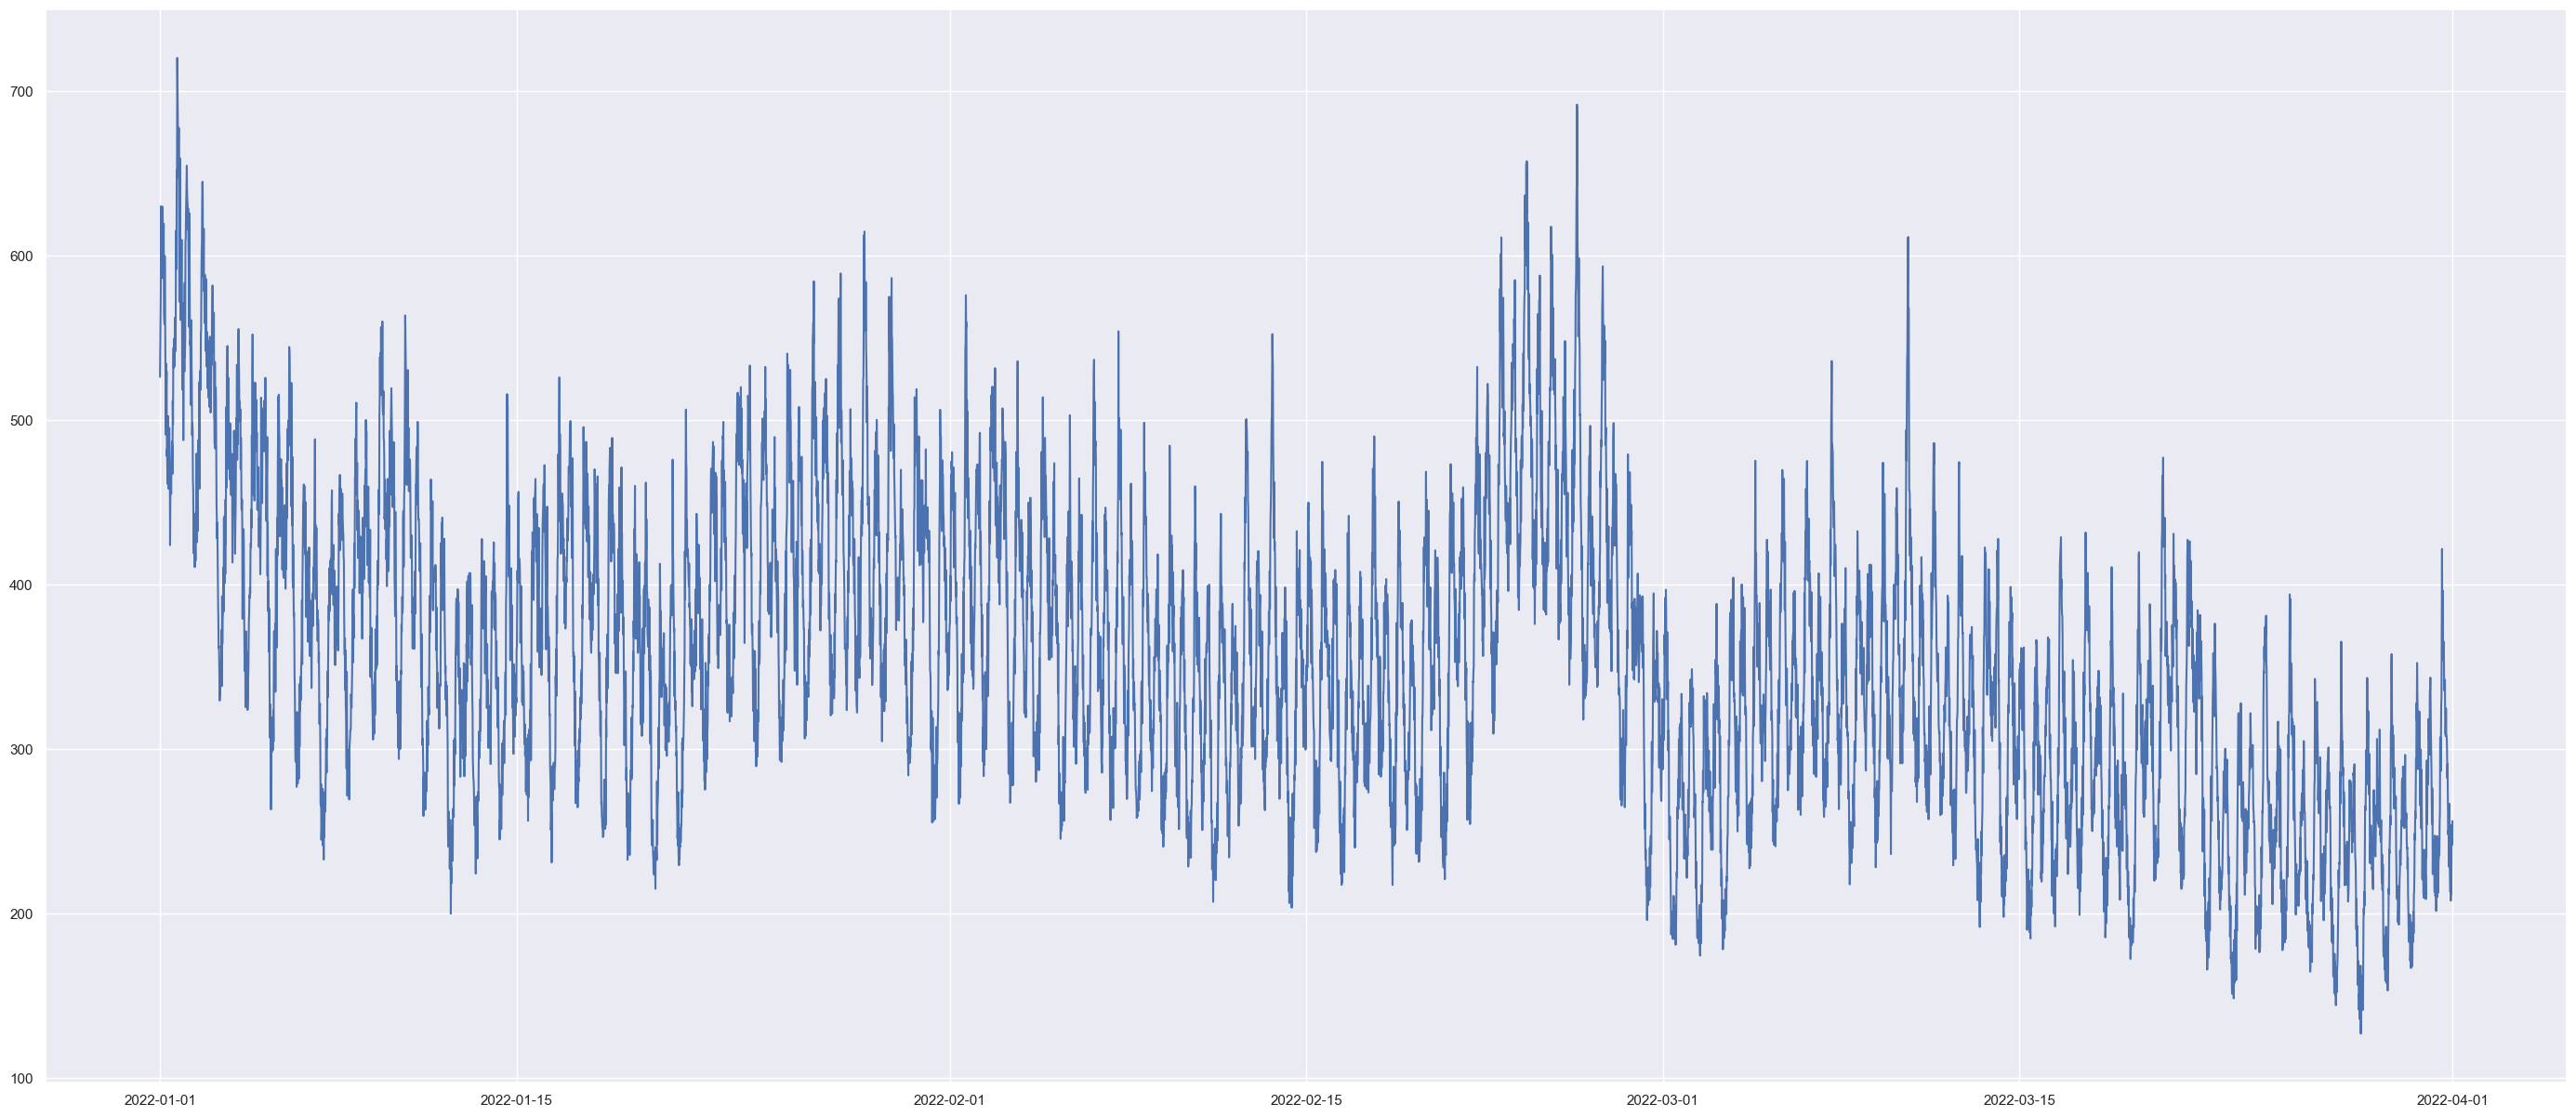

In [71]:
plt.plot(mains_Q1_2022.sum(axis=1))

NameError: name 'df_jan_22' is not defined

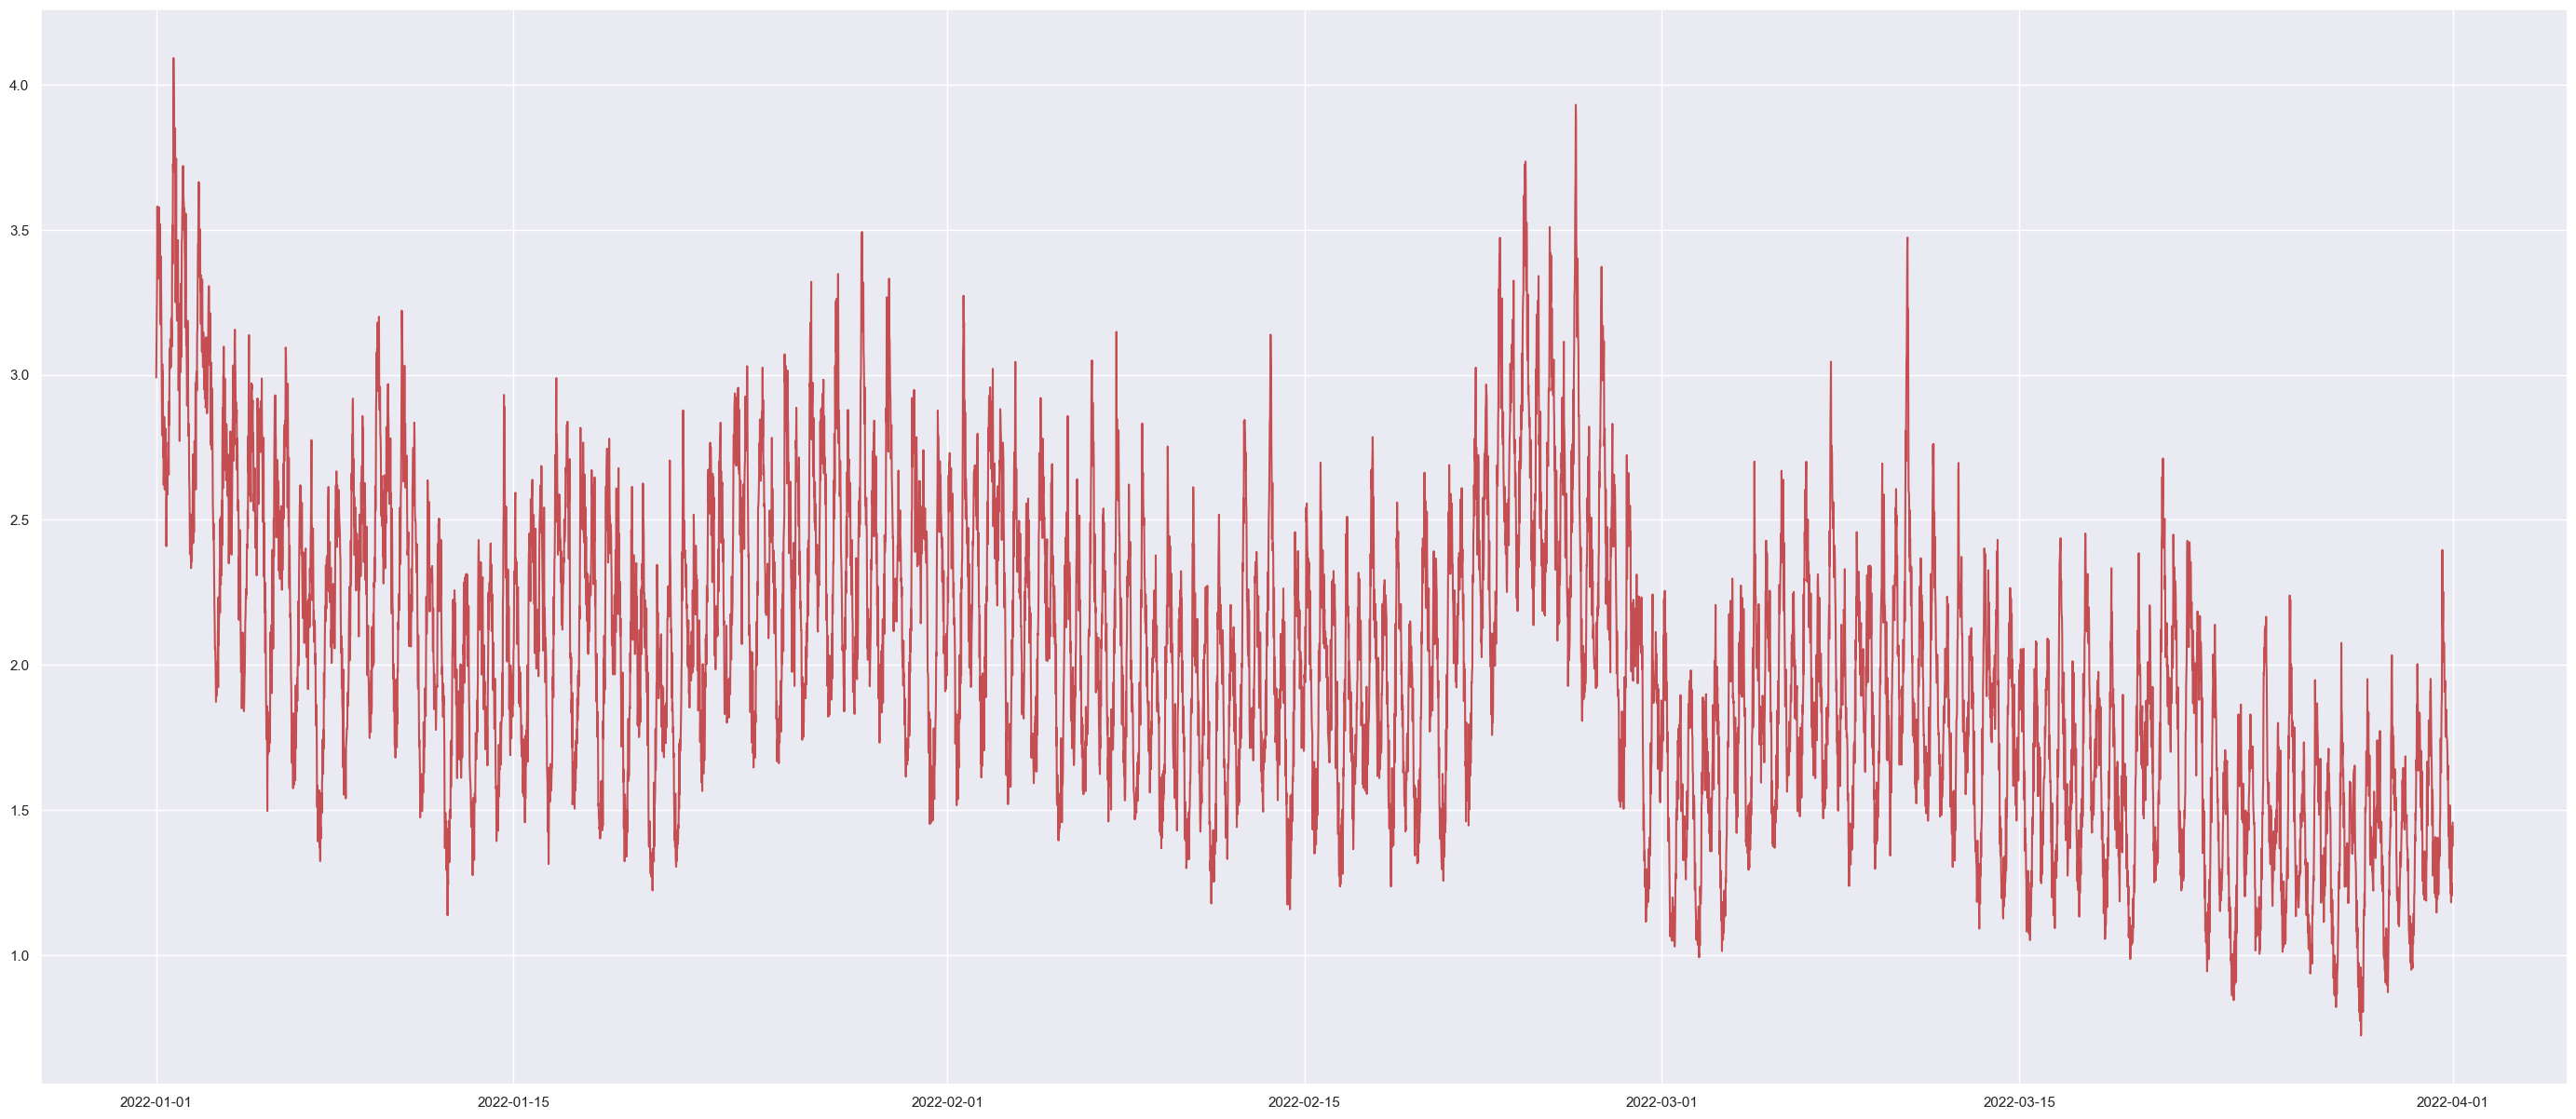

In [72]:
plt.plot(mains_Q1_2022.mean(axis=1),color="r")
ax=sb.pointplot( x = "min_t", y= "power",data = df_jan_22, ci = "sd", errwidth=0.1)
ax.set(title='Mean and Stnd Deviation of 199 houses in the EULR dataset for Jan 2022')
#ax.set_xticklabels(plot_index,rotation=0)
plt.ylabel('power averaged for 15 min interval (kW)')
plt.xlabel('minutes wise mean for 31 days')
# display
plt.savefig("mean and stnd dev jan 2022")
plt.show()

In [73]:
mains_Q1_2022.reset_index(inplace=True)

In [74]:
mains_Q1_2022

ee_site_id,min_t,493,497,751,759,851,865,913,971,976,...,10706,10746,10806,10811,10936,11061,11071,11101,11116,11141
0,2022-01-01 00:00:00,2.281,4.962,2.526,2.315,4.424,2.078,5.675,0.195,2.822,...,1.614,6.619,0.586,2.852,7.167,2.192,2.303,1.391,0.641,3.665
1,2022-01-01 00:15:00,2.124,4.339,2.233,1.017,6.256,5.931,6.204,1.197,2.999,...,1.350,3.881,0.760,2.778,7.062,2.707,2.106,2.156,0.517,5.687
2,2022-01-01 00:30:00,2.101,4.627,2.319,4.018,3.866,3.161,6.027,0.600,3.043,...,0.952,4.936,2.846,6.745,7.932,1.700,6.704,1.466,0.561,7.442
3,2022-01-01 00:45:00,2.187,6.167,2.516,3.028,3.105,2.582,8.541,1.274,2.853,...,0.629,4.117,0.640,3.420,3.240,3.164,6.476,1.985,0.670,3.014
4,2022-01-01 01:00:00,2.924,4.755,2.712,1.045,3.240,3.355,9.716,0.250,3.415,...,0.745,6.808,0.532,3.926,3.219,4.057,6.159,1.401,0.678,8.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,2022-03-31 22:45:00,0.398,0.469,1.624,0.287,2.131,2.134,2.507,0.225,1.238,...,0.351,2.107,0.796,0.852,0.645,0.488,4.214,1.615,0.267,5.330
8632,2022-03-31 23:00:00,2.865,0.893,1.523,0.155,2.105,2.107,2.583,0.206,1.874,...,0.289,7.297,0.711,0.776,0.539,0.350,2.751,2.975,0.324,1.664
8633,2022-03-31 23:15:00,2.764,0.817,2.043,0.158,1.919,2.124,4.179,0.213,0.660,...,0.311,9.250,0.696,0.521,0.456,0.344,3.109,2.133,0.277,1.934
8634,2022-03-31 23:30:00,1.964,0.639,1.918,0.271,2.666,2.322,5.151,0.203,1.135,...,0.357,4.873,0.774,1.911,0.509,1.129,3.475,2.042,0.464,2.789


In [75]:
%store mains_Q1_2022

Stored 'mains_Q1_2022' (DataFrame)


In [76]:
acf_=mains_Q1_2022[(mains_Q1_2022["min_t"]>="2022-02-01 00:00:00") & (mains_Q1_2022["min_t"]<="2022-02-02 23:45:00")]

In [77]:
acf_total=acf_.sum(axis=1)

C:\Users\dube.rohit\AppData\Local\Temp\ipykernel_6384\1207590899.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  acf_total=acf_.sum(axis=1)


In [78]:
acf_total

2976    376.049
2977    376.272
2978    405.464
2979    389.854
2980    437.381
         ...   
3163    399.914
3164    388.082
3165    419.339
3166    460.431
3167    415.322
Length: 192, dtype: float64

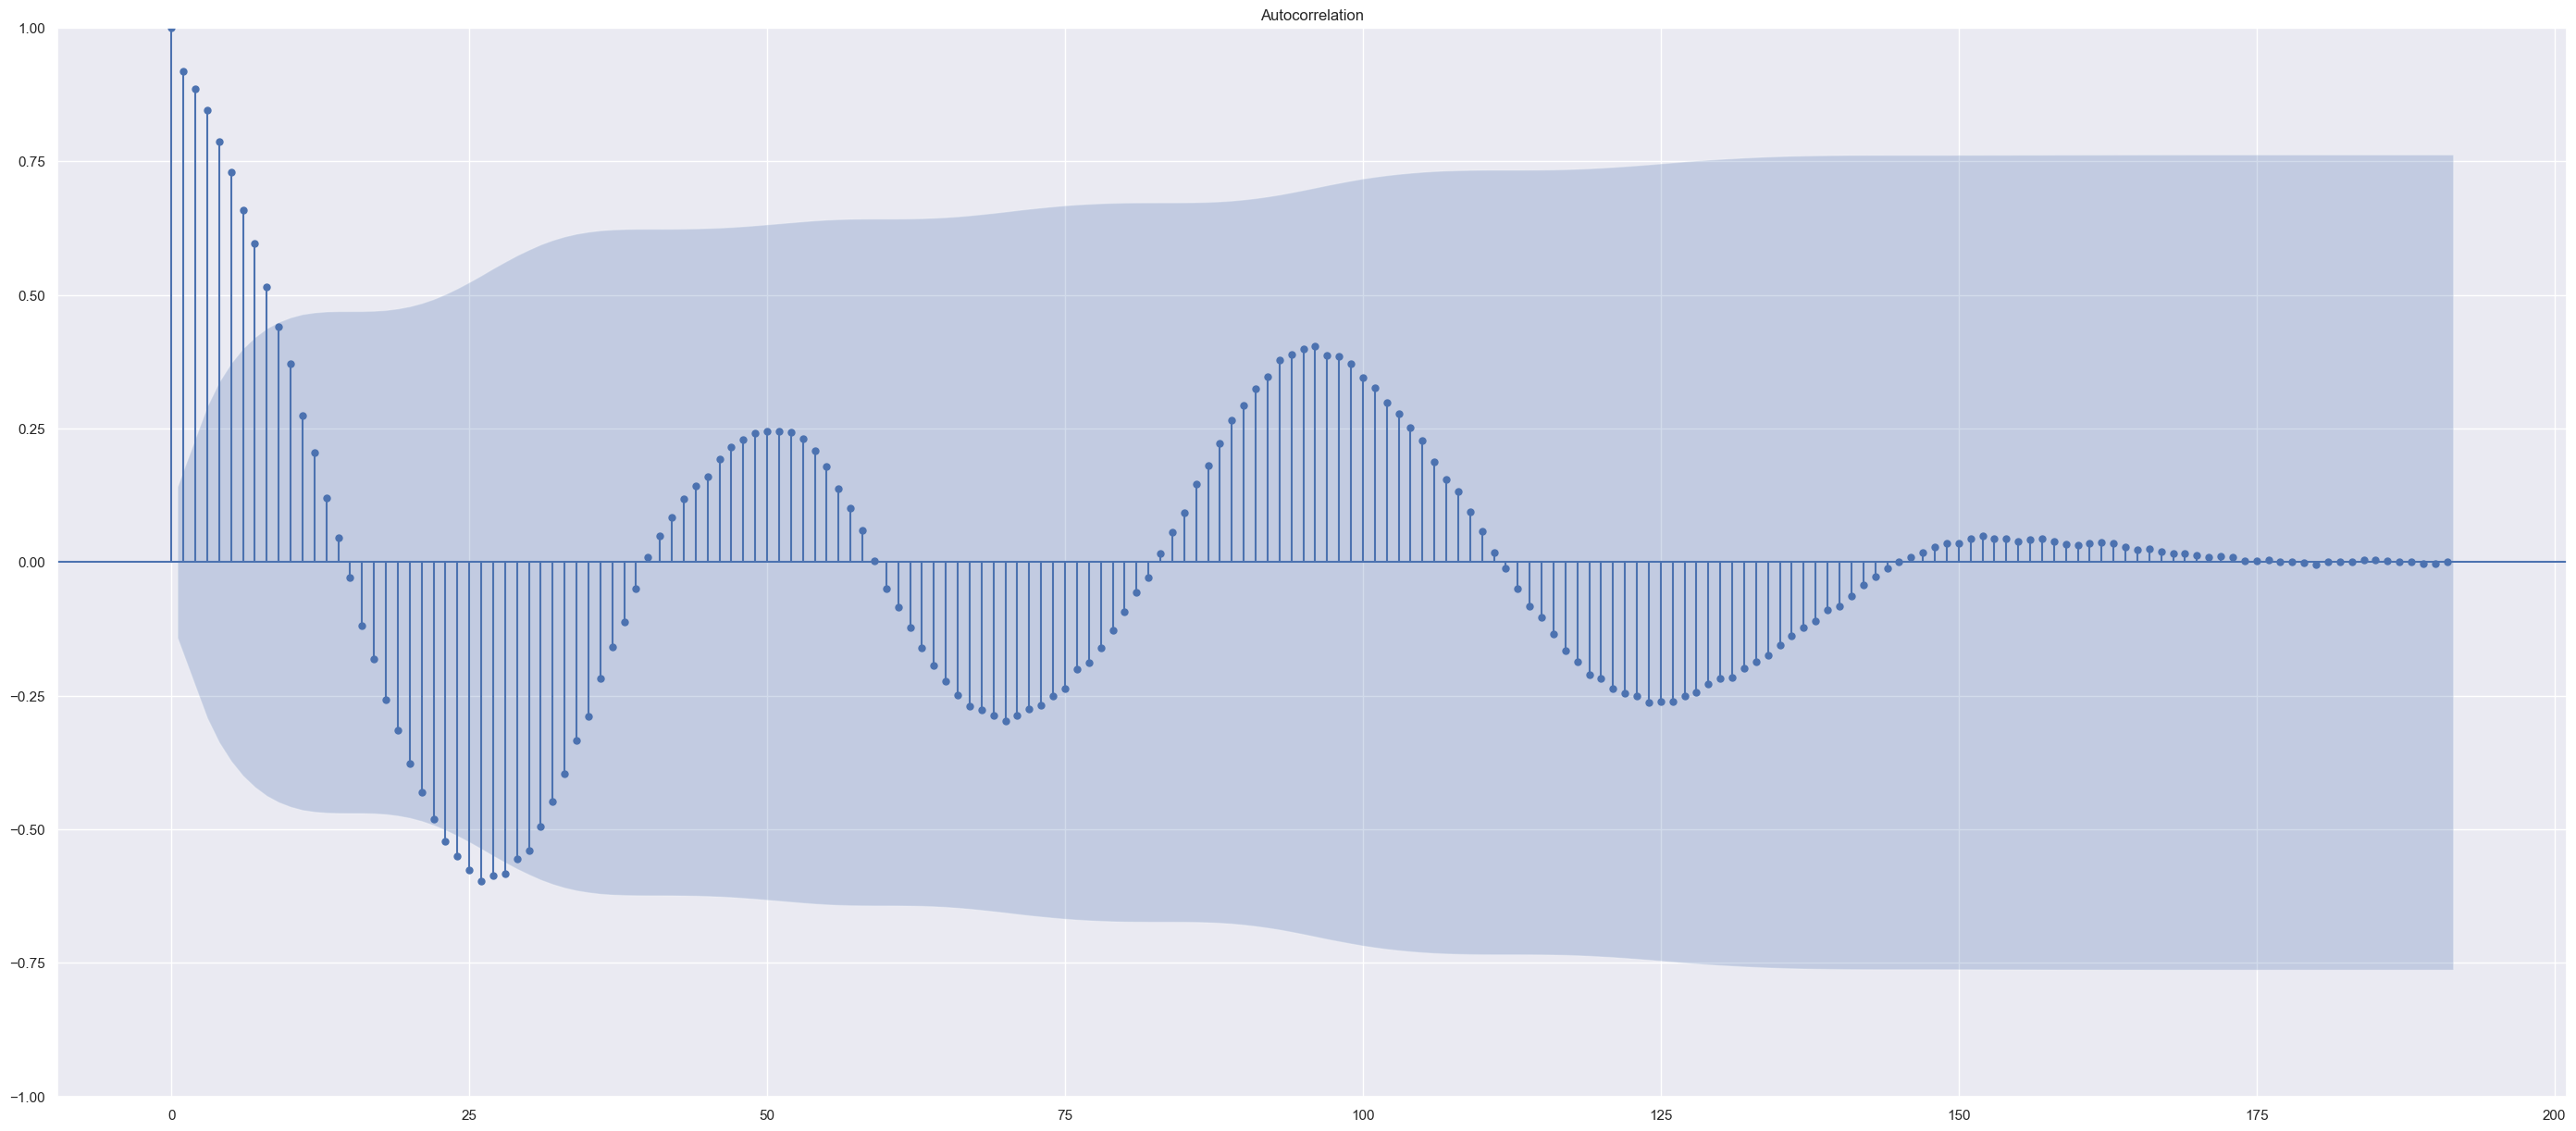

In [79]:
# Display the autocorrelation plot of Q1 time series
fig = tsaplots.plot_acf(acf_total, lags=191)
plt.show()